In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv('C:\\Users\\bhargav\\test.csv',encoding='latin-1')

In [20]:
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [22]:
data.shape

(4815, 9)

In [24]:
data['sentiment'].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

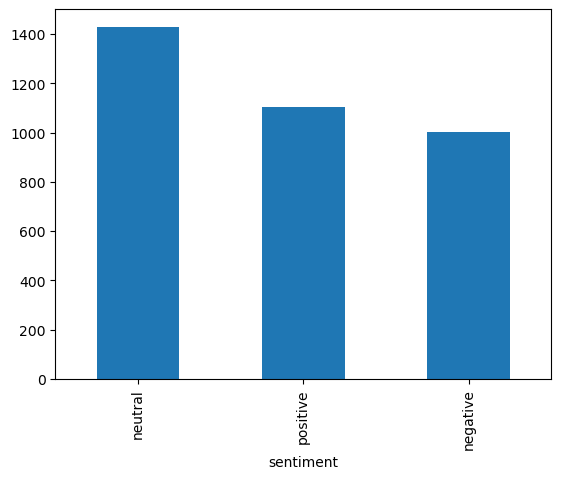

In [25]:
data['sentiment'].value_counts().plot(kind='bar')

In [26]:
data['text'][613]

' Ian and I are going to a matinee tomorrow, or that`s the plan at least...it`s going to be too expensive for 3d at night'

In [30]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\([DP)][\W])') 

def preprocessing(text):
    if not text: 
        return []
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-',' ')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set and word.isalnum()]

    return " ".join(text)

In [43]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world'

In [45]:
data['text'] = data['text'].apply(lambda x: preprocessing(x) if pd.notnull(x) else x)

In [46]:
data['text']

0                 last session day http twitpic com 67ezh
1       shanghai also realli excit precis skyscrap gal...
2       recess hit veroniqu branquinho quit compani shame
3                                              happi bday
4                             http twitpic com 4w75p like
                              ...                        
4810                                                  NaN
4811                                                  NaN
4812                                                  NaN
4813                                                  NaN
4814                                                  NaN
Name: text, Length: 4815, dtype: object

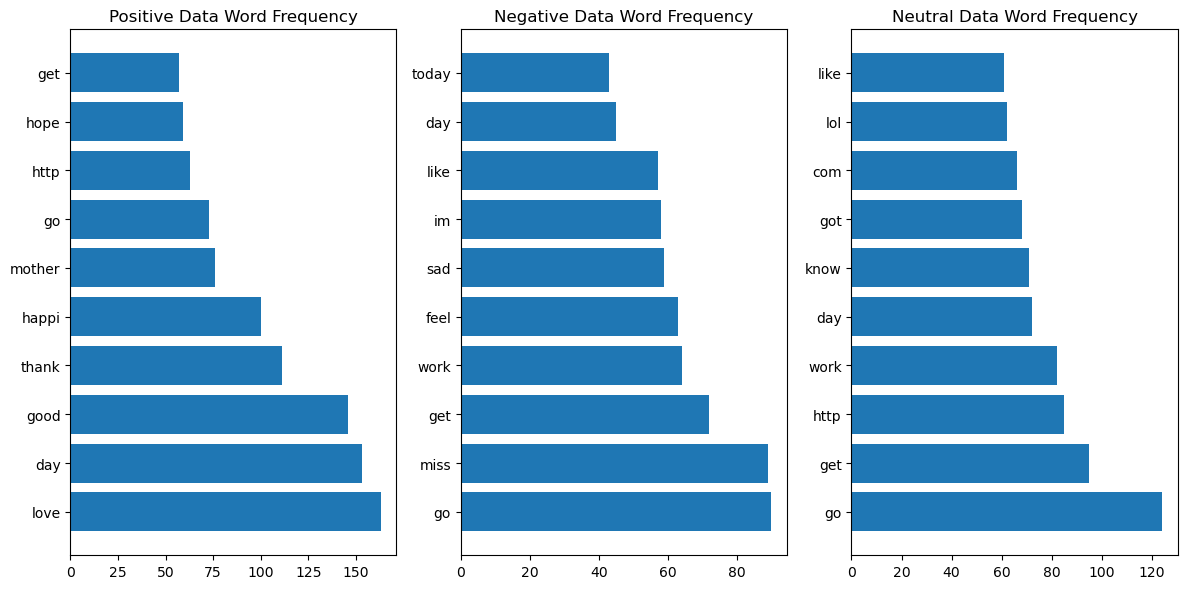

In [50]:
positivedata = data[data['sentiment'] == 'positive']
positivedata = positivedata['text']
negdata = data[data['sentiment'] == 'negative']
negdata = negdata['text']
neutraldata = data[data['sentiment'] == 'neutral']
neutraldata = neutraldata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Neutral data
neutraldata_words = ' '.join(neutraldata).split()
neutraldata_word_counts = Counter(neutraldata_words)
neutraldata_common_words = neutraldata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

# Neutral data word frequency
axes[2].barh(range(len(neutraldata_common_words)), [count for _, count in neutraldata_common_words], align='center')
axes[2].set_yticks(range(len(neutraldata_common_words)))
axes[2].set_yticklabels([word for word, _ in neutraldata_common_words])
axes[2].set_title('Neutral Data Word Frequency')

plt.tight_layout()
plt.show()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = data.dropna(subset=['text'])

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.text)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [55]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    5.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.0s finished


In [56]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.599320882852292


In [57]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [89]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)
    return prediction

prediction=prediction("I miss you Grandma...it has been 10 years since you died")

In [90]:
if prediction == 'positive':
    print("positive comment")
elif prediction=='negative':
    print("negative comment")
else:
    print("neutral")

negative comment
